### K-NN

가장 단순한 알고리즘이다. 새로운 데이터 포인트를 예측 할 때는 훈련 데이터셋으로 만들어 놓은 k-NN 모델에서 **가장 가까운 데이터 N개**를 이용해 예측을 한다.

In [2]:
#필요 라이브러리 임포트
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split
import platform
import warnings
warnings.filterwarnings(action='ignore')
plt.rcParams['axes.unicode_minus'] = False

path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~~')

#### k-NN 분류 보델

mglearn 라이브러리에 forge 데이터 셋을 이용해 k-NN이 적용된 데이터가 있다.

In [13]:
def make_figure(row, col, n=8,m=4):
    n = 4 * col; m = 4 * row
    f, ax = plt.subplots(row, col, figsize = (n,m))
    return f, ax

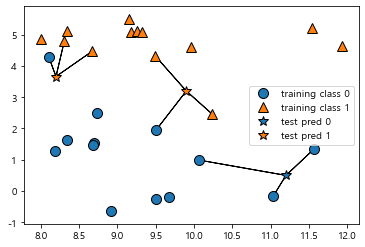

In [16]:
mglearn.plots.plot_knn_classification(n_neighbors=3) # n_neighbors : 이웃의 갯수

- 동그라미 : 훈련데이터
- 별 : test 데이터
- n_neighbors의 수만큼 **근접한 이웃이 선택**되고, `투표`를 통해 최종 분류가 된다.

<br>

#### 클래스가 다수인 데이터셋에도 젹용가능하다.

In [17]:
from sklearn.model_selection import train_test_split # 일반화 성능 평가를 위해 기존 데이터를 훈련 세트와 테스트 세트로 나눔
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [19]:
from sklearn.neighbors import KNeighborsClassifier #k-NN 분류 임포트
clf = KNeighborsClassifier(n_neighbors = 3) # 이웃의 갯수를 3개 갖는 모델 생성
clf.fit(X_train, y_train) # 훈련하기

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [21]:
print("테스트 세트 예측: {}".format(clf.predict(X_test)))
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 예측: [1 0 1 0 1 0 0]
테스트 세트 정확도: 0.86


이어서 이웃의 수에 따라 k-NN모델이 어떻게 데이터를 구분하는지 확인해보자.

다음과 같이 지정한 영역으로 나뉘는 경계를 **결정 경계(decision boundary)**라고 한다.

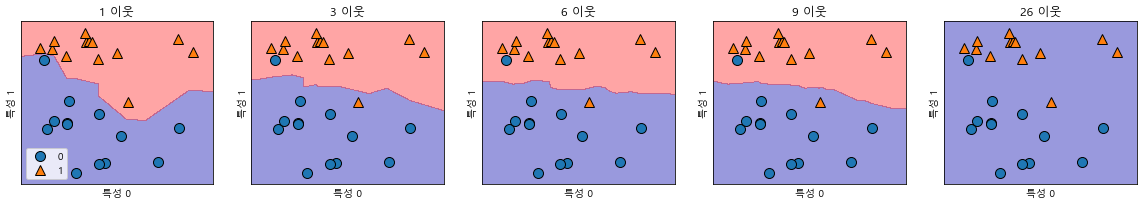

In [22]:
fig, axes = plt.subplots(1, 5, figsize=(20,3))

for n_neighbors, ax in zip([1,3,6,9,26], axes):
    # fit 메서드는 self 반환을 하기 때문에 객체 생성과 메서드를 한줄에 사용 할 수 있습니다.
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1],y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
    
axes[0].legend(loc=3)

- 이웃이 1개일 때는 결정 경계가 **훈련데이터에 최대한으로 맞춰져 있어 `과대적합` 가능성**이 있어 보인다.
- 이웃이 3개부터 증가할 수록 경계가 완만해지는 것을 볼 수 있다.
- 가장 오른쪽 그림을 보면 극단적으로 26개의 이웃을 가진 경우로 분석했을 경우 **`과소 적합`**이 되었다.

> #### 모델의 갯수가 적으면 복잡도가 증가해 `과대적합` 가능성
> #### 모델의 개수가 많아지면 복잡도가 감소해 `과소적합` 가능성

#### - 유방암 데이터를 이용해 k-NN 알아보기 -

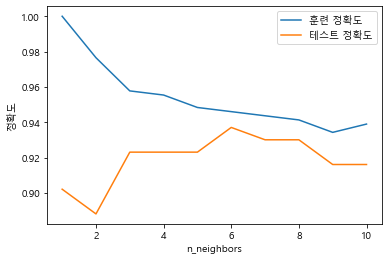

In [25]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer() #유방암 데이터 불러오기

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify=cancer.target, random_state=66) # 테스트 세트와 훈련 세트 분할

training_accuracy = [] # 각 이웃 개수 별 훈련 세트에 대한 정확도를 저장할 리스트
test_accuracy = [] # 각 이웃 개수 별 테스트 세트에 대한 정확도를 저장할 리스트

#이웃의 개수 설정 (1개 ~ 10개 까지)
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    #모델 생성하기
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    
    #훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    #일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))

# 이웃 개수에 대한 훈련 세트 정확도 선 그래프 그리기
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도") 
# 이웃 개수에 대한 테스트 세트 정확도 선 그래프 그리기
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도") 
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

그래프를 보면 과대적합과 과소적합의 특성을 알 수 있다.

- 이웃의 개수가 적으면 train의 정확도는 높지만 test의 정확도는 낮다 => **과대적합**
- 이웃의 개수가 많아지면 모델이 단순해지면서 train, test의 정확도가 동시에 낮아진다. => **과소적합**

> 가장 좋은 이웃의 갯수는 **train, test의 정확도가 비슷해지는 6개**이다.

### k-NN 회귀

mglearn 패키지에 wave 데이터 셋을 이용한 회귀 시각화

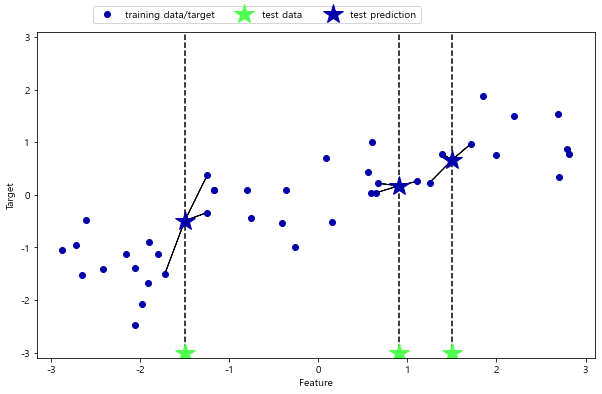

In [27]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

#### train의 값 중 가까운 n개의 점을 찾아 그 평균을 회귀 결과값을 예측

In [30]:
from sklearn.neighbors import KNeighborsRegressor # k-NN 회귀를 위한 KNeighborsRegressor 임포트

X, y = mglearn.datasets.make_wave(n_samples=40)

#wave 데이터셋을 훈련 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델 객체 생성하기
reg = KNeighborsRegressor(n_neighbors = 3)

# 훈련 데이터와 타깃을 사용하여 모델 학습 시키기
reg.fit(X_train, y_train)

print("테스트 세트 예측 :\n{}".format(reg.predict(X_test)))
print()
print("테스트 세트 R^2 : {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 예측 :
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]

테스트 세트 R^2 : 0.83


- 회귀분석일 때 **$R^2$ 값인 결정 계수**를 반환
- **결정 계수**
    - 회귀 식이 주어진 데이터를 얼마나 잘 설명하는지 나타내는 정도
    - 0 ~ 1 사이의 값으로 1은 예측이 완벽한 경우

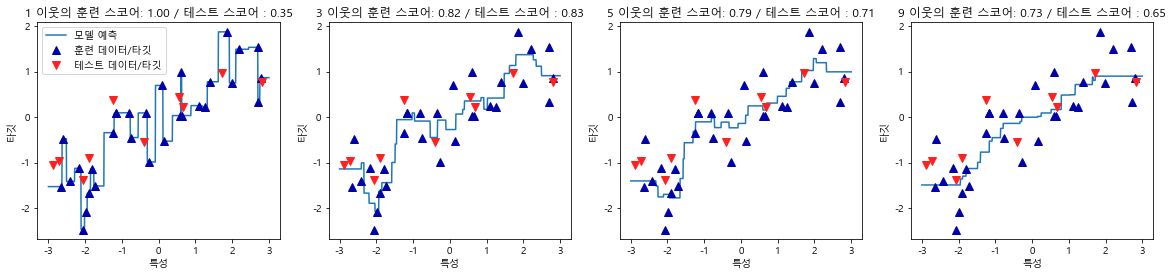

In [31]:
fig, axes = plt.subplots(1,4, figsize=(20,4))
#-3과 3 사이에 1000개의 데이터 만들기 -> 테스트 용도로 사용함
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1,3,5,9], axes):
    # 이웃의 개수를 1,3,9로 하여 예측하는 모델을 만듭니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line)) # 테스트 용도로 만든 데이터를 예측하고 예측 결과를 선으로 표현합니다.
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8) # 훈련 데이터를 그래프에 표시합니다.
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)   # 테스트 데이터를 그래프에 표시합니다.
    
    # 훈련 데이터의 점수와 테스트 데이터의 점수를 제목에 표현합니다.
    ax.set_title("{} 이웃의 훈련 스코어: {:.2f} / 테스트 스코어 : {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")

axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")

> - 왼쪽은 과대적합일 가능성이 높고 왼쪽으로 갈수록 과소적합일 가능성이 높다.
- 위의 표 중에서는 3개의 이웃일 때 train, test의 score가 높기 때문에 가장 예측을 잘하는 모델이라고 볼 수 있다.

#### 매개변수

- 매개변수 : 이웃의 갯수, 거리 공식
    - 거리 공식
        - **euclidean (default)** : sqrt(sum((x - y)^2))
        - manhattan : sum(|x - y|)
        - chebyshev : max(|x - y|)
        - minkowski : sum(|x - y|^p)^(1/p)
        - wminkowski : sum(|w * (x - y)|^p)^(1/p)
        - seuclidean : sqrt(sum((x - y)^2 / V))
        - mahalanobis : sqrt((x - y)' V^-1 (x - y))
       
<br>

> ### 장점
- **이해하기 쉬운 모델**
- **많은 조정 필요 없이 좋은 성능을 발휘**

> ### 단점
- **훈련 세트가 매우 크면 예측이 느리다.**
- **수백개의 특성을 가진 data에서 느리고, 희소 행렬 또한 잘 작동하지 않는다.**

#### 결과적으로 예측이 느리고 많은 특성을 처리하는 능력이 부족하기에 현업에서는 잘 사용하지 않는다.

#### k-NN 알고리즘의 단점을 극복하는 것이 선형 모델이다.